# Problem Sheet 2

- To be completed by **12noon** on Wed **16th Oct** and uploaded to [Problem Sheet 2 submission point](https://moodle.bath.ac.uk/mod/assign/view.php?id=1371305) on Moodle.

In Tasks (a) and (b) we consider a simplified case of $n=1$ and $h_{\theta}(x) = \theta x$ and assume a quadratic pointwise loss, $\ell(y,\hat y) = (y-\hat y)^2.$
We also assume that data are samples of a random variable pair $(X,Y) \sim \mathbb{P}$.

## Task (a) (Warm-up)

- Find the expected risk $\mathbb{E}[\ell(h_{\theta}(X),Y)]$ in terms of $\theta$ and suitable expectations.
- Find the best parameter $\theta^{best} = \arg\min_{\theta \in \mathbb{R}} \mathbb{E}[\ell(h_{\theta}(X),Y)].$

#### Solution:
$$
\mathbb{E}[\ell(h_{\theta}(X),Y)] = \mathbb{E}[(\theta X - Y)^2] = \mathbb{E}[\theta^2 X^2 - 2 \theta X Y + Y^2] = \theta^2 \mathbb{E}[X^2] - 2 \theta \mathbb{E}[XY] + \mathbb{E}[Y^2].
$$
Note that $\theta$ is independent of $X$ and $Y$, hence it can be taken out of the expectation. In contrast, $X$ and $Y$ are dependent, so the product $XY$ should remain under the expectation.

Differentiating this over $\theta$ and taking the derivative to zero gives
$$
\frac{d \mathbb{E}[\ell(h_{\theta}(X),Y)]}{d\theta}(\theta^{best}) = 2 \theta^{best} \mathbb{E}[X^2] - 2  \mathbb{E}[XY] = 0
$$
which gives
$$
\theta^{best} = \frac{\mathbb{E}[XY]}{\mathbb{E}[X^2]}.
$$

## Task (b)
- Assume $X$ is uniformly distributed on $[-1,1]$, $X \sim \mathcal{U}(-1,1)$, and consider two options of generating data:
  - $Y = X$, and 
  - $Y = X - X^3$.
  
For each of those options for $Y$, compute $\theta^{best}$ and the corresponding expected risk $\mathbb{E}[\ell(h_{\theta^{best}}(X),Y)]$. What can you say about these $\theta^{best}$ and the accuracy of the prediction rule $h_{\theta^{best}}$ in each case?

#### Solution:
Using the formula from Task (a), 
$$
\theta^{best} = \frac{\int_{-1}^1 x^2 \frac{1}{2} dx}{\int_{-1}^{1}x^2 \frac{1}{2} dx} = 1, 
\quad \text{and} \quad 
\theta^{best} = \frac{\int_{-1}^1 (x^2 - x^4) \frac{1}{2} dx}{\int_{-1}^{1}x^2 \frac{1}{2} dx} = 1 - \frac{2/5}{2/3} = \frac{2}{5}
$$
for $Y=X$ and $Y=X-X^3$, respectively. The expected risk is trivially $0$ in the first case, and 
$$
\mathbb{E}[\ell(h_{\theta^{best}}(X),Y)] = \underbrace{\frac{1}{2}}_{f_X}\left(\frac{4}{25} \frac{2}{3} - 2 \frac{2}{5} \left(\frac{2}{3} - \frac{2}{5}\right) + \left(\frac{2}{3} - 2 \frac{2}{5} + \frac{2}{7}\right)\right) = \frac{12}{525}
$$
in the second case. Note that $Y=X$ can be resolved by the prediction rule $h_{\theta}(x) = \theta x$ exactly with $\theta=1=\theta^{best}$, while in the second case $X^3$ cannot be resolved by a linear function.

---

## Task 1: simulating the "true" distribution

For testing the convergence of the empirical risk we cannot use the temperature data (or any actual data in fact), since it's obviously finite, and we cannot let $|D| \rightarrow \infty$. To select a _class_ of models, or to test numerical algorithms, one often designs a **synthetic** distribution with known properties. One can then sample as many realisations from this distribution as desired.

- **Write** a Python **function** `TrueSample()` which returns a pair x,y which is a random sample from the following distribution:
   - $X \sim \mathcal{U}(-1,1)$ is a random value uniformly distributed between -1 and 1;
   - for a given $X$, compute the label as $Y = X - X^3 + \frac{1}{10} \Xi$, where $\Xi \sim \mathcal{N}(0,1)$ is a random variable with the standard normal distribution.   
   
   _Hint: read upon [numpy.random](https://numpy.org/doc/1.16/reference/routines.random.html) module_
 
- **Compute** 30 samples of x and y from `TrueSample()` and store them in _numpy_ arrays X and Y, respectively.
- **Plot** array Y vs array X using `plot()` from _matplotlib_'s _pyplot_ module. Make sure you plot **only points** (x,y) (not lines connecting them).

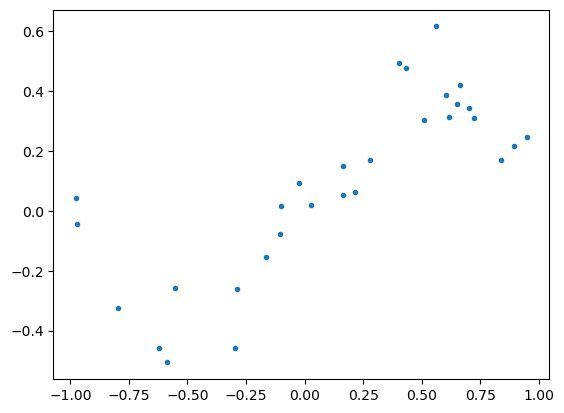

In [1]:
import numpy as np
from matplotlib import pyplot as plt    

def TrueSample():
    x = np.random.uniform(-1,1)
    y = x - x**3 + 0.1*np.random.randn()
    return x,y

Nsamples = 30
Y = np.zeros(Nsamples)
X = np.zeros(Nsamples)
for i in range(Y.size):
    X[i],Y[i] = TrueSample()

plt.plot(X,Y, '.')
plt.show()

## Task 2: convergence of the parameter
- **Copy** over functions `features` and `optimise_loss` from Problem Sheet 1 (your implementation or my model solution)
- Take $n=1$ and **compute** $\boldsymbol\theta^* \in \mathbb{R}^2$ using `optimise_loss` applied to the data X and Y prepared in Task 1.
- **Vary** the number of samples in Task 1 in a range 30, 100, 300, 1000, 3000, and for each corresponding realisation of X and Y compute the corresponding $\boldsymbol\theta^*$.
- **Compare** $\theta^*_1$ with $\theta^{best}$ found in Task (b) as the number of samples increases.

In [2]:
def features(x,n):
    powers = np.arange(n+1)               # [0,1,2,...,n]
    powers = np.reshape(powers, (1, -1))  # Make it explicitly a row vector
    x = np.reshape(x, (-1, 1))            # Make it explicitly a column vector
    return x**powers                      # Python automatically broadcasts the vectors to each others' shapes 
                                          # and takes the power between the resulting matrices elementwise

def optimise_loss(V,y):
    return np.linalg.solve(V.T @ V, V.T @ y)

theta = optimise_loss(features(X,1),Y)
print(theta)

[0.03755791 0.40893041]
